In [5]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
cw = pd.read_csv('cw_full.csv').drop('Unnamed: 0', axis=1)
print(cw.shape)
cw.head()

(119726, 8)


,title,clue,date,year,answer,unique,day,answer_count
0,,One may hold a ship in place,December 23,2016,TRACTORBEAM,True,Friday,1
1,,Network initials,December 23,2016,DSL,False,Friday,15
2,,Visa option,December 23,2016,CASHADVANCE,True,Friday,1
3,,"It resembles an ""n"" when lowercase",December 23,2016,ETA,False,Friday,73
4,,"Northeast nickname, with ""the""",December 23,2016,EMPIRESTATE,False,Friday,1


In [26]:
HBO = cw[(cw['answer']=='HBO')].sort_values(['year', 'date']).reset_index(drop=True)

HBO['show'] = ["Boardwalk Empire", "Boardwalk Empire", "The Newsroom", "True Blood", "Girls", "Game of Thrones", "Veep",
               "Veep", "Game of Thrones", "Girls", "Game of Thrones", np.nan, "Game of Thrones", "True Detective"]
HBO

,title,clue,date,year,answer,unique,day,answer_count,show
0,,"""Boardwalk Empire"" airer",September 5,2012,HBO,False,Wednesday,14,Boardwalk Empire
1,ARTFUL THINKING,"""Boardwalk Empire"" network",July 21,2013,HBO,False,Sunday,14,Boardwalk Empire
2,WHO'S LEFT?,"""The Newsroom"" channel",October 27,2013,HBO,False,Sunday,14,The Newsroom
3,THAT GIRL,"""True Blood"" network",September 15,2013,HBO,False,Sunday,14,True Blood
4,,"""Girls"" home",April 11,2014,HBO,False,Friday,14,Girls
5,FILL-IN-THE-BLANKS,"""Game of Thrones"" airer",December 28,2014,HBO,False,Sunday,14,Game of Thrones
6,,"""Veep"" channel",June 4,2014,HBO,False,Wednesday,14,Veep
7,,"""Veep"" airer",March 29,2014,HBO,False,Saturday,14,Veep
8,,"""Game of Thrones"" network",March 5,2014,HBO,False,Wednesday,14,Game of Thrones
9,,"Where to find ""Girls""",August 21,2015,HBO,False,Friday,14,Girls


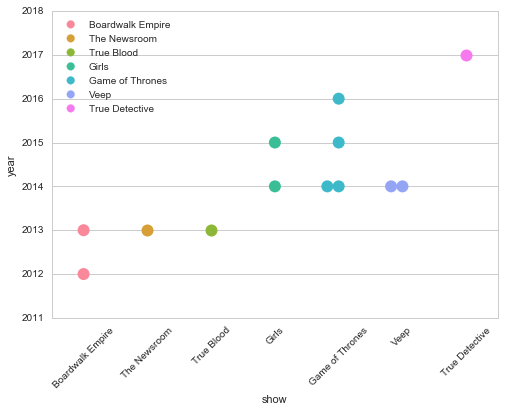

In [27]:
sns.set(style="whitegrid", palette="muted")
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Draw a categorical scatterplot to show each observation
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)

sns.swarmplot(x="show", y="year", hue="show", data=HBO, size=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)


plt.show()

In [35]:
HBO_Shows = pd.DataFrame({'show': ['Boardwalk Empire', 'The Newsroom', 'True Blood','Girls', 
                                   'Game of Thrones', 'Veep', 'True Detective'],
                         'Year of Pilot Episode' : [2010, 2012, 2008, 2012, 2011, 2012, 2014]})
HBO_Shows

,Year of Pilot Episode,show
0,2010,Boardwalk Empire
1,2012,The Newsroom
2,2008,True Blood
3,2012,Girls
4,2011,Game of Thrones
5,2012,Veep
6,2014,True Detective


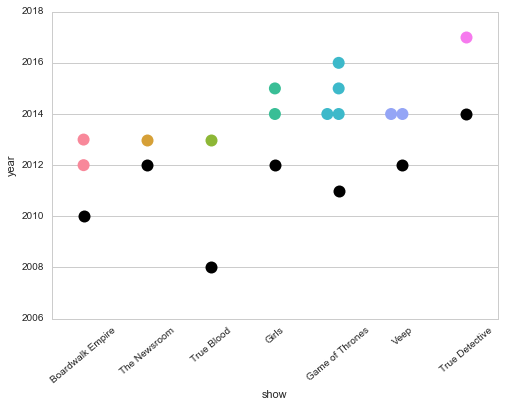

In [55]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)

sns.swarmplot(x="show", y="Year of Pilot Episode", color='black', data=HBO_Shows, 
              size=12)
sns.swarmplot(x="show", y="year", hue="show", data=HBO, size=12)
ax.legend_.remove()
plt.xticks(rotation=40)


plt.show()

In [39]:
HBO_joined = pd.merge(left=HBO, right=HBO_Shows, how='inner', on='show')
HBO_joined

,title,clue,date,year,answer,unique,day,answer_count,show,Year of Pilot Episode
0,,"""Boardwalk Empire"" airer",September 5,2012,HBO,False,Wednesday,14,Boardwalk Empire,2010
1,ARTFUL THINKING,"""Boardwalk Empire"" network",July 21,2013,HBO,False,Sunday,14,Boardwalk Empire,2010
2,WHO'S LEFT?,"""The Newsroom"" channel",October 27,2013,HBO,False,Sunday,14,The Newsroom,2012
3,THAT GIRL,"""True Blood"" network",September 15,2013,HBO,False,Sunday,14,True Blood,2008
4,,"""Girls"" home",April 11,2014,HBO,False,Friday,14,Girls,2012
5,,"Where to find ""Girls""",August 21,2015,HBO,False,Friday,14,Girls,2012
6,FILL-IN-THE-BLANKS,"""Game of Thrones"" airer",December 28,2014,HBO,False,Sunday,14,Game of Thrones,2011
7,,"""Game of Thrones"" network",March 5,2014,HBO,False,Wednesday,14,Game of Thrones,2011
8,,"""Game of Thrones"" airer",July 8,2015,HBO,False,Wednesday,14,Game of Thrones,2011
9,,"""Game of Thrones"" network",May 11,2016,HBO,False,Wednesday,14,Game of Thrones,2011
